In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_theme()

# **1. Data Reading and Understanding**
 
Read the data from csv file using pandas. Verify if the data is read properly using head() function. Understand the data variables.

In [44]:
df = pd.read_csv("loan.csv")
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# **2. Data Cleaning**

1.   Identify required columns, columns with improper names, columns having wrong datatypes and columns having missing values
2.   Create df with only required columns and rows
3.   Drop unnecessary columns(columns having single values for all the records, or that won't be useful for the analysis)
4.   Rename columns for better understanding and presentation
5.   Fix missing values
6.   Fix incorrect datatypes
7.   Filter Rows (Remove outliers that can deviate the result and analysis)






#### **1. Identify required columns, columns with improper names, columns having wrong datatypes and columns having missing values**



In [45]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

#### **2. Create df with only required columns and rows.**

In [46]:
# Columns having more than 30% of the missing values are not useful for the analysis. So we will remove those first

df=df[df.columns[df.isnull().mean()<0.3]]

**Dividing the remaining columns into 3 types of data:**

1.   Customer Demographic data: employment title, employment length, zip code, address state, etc.
2.   Loan Application data: Loan amount, Term, Interest rate, Grade, DTI (Debt to Income), etc
3.   Customer Behavioural data: out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv

Now, the 3rd type of data is generated after the loan is accepted. So these data won't be useful in identifying if the applicant will default or not. So this data can be removed.



In [47]:
df=df.drop(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)

In [48]:
# Rows having more than 30% of the missing values are also not helpful for the analysis. So we will remove those too
# Checking the numbers of rows having more than 30% missing values, and removing those

df[df.isnull().mean(axis=1)>0.3] # No rows having more than 30% missing values

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [49]:
# We also don't need the records with "Current" loan status.
# Because they have not yet fully paid the loan for defaulted.
# So the data for these records will not be useful for our analysis

df=df[~(df.loan_status=="Current")]

#### **3. Drop unnecessary columns(columns having single values for all the records, or that won't be useful for the analysis)**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

##### Remove the columns that have same values for all the rows

In [51]:
df.acc_now_delinq.unique()

array([0])

In [52]:
df.initial_list_status.unique()

array(['f'], dtype=object)

In [53]:
df.pymnt_plan.unique()

array(['n'], dtype=object)

In [54]:
df.policy_code.unique()

array([1])

In [55]:
df.delinq_amnt.unique()

array([0])

In [56]:
df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [57]:
df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [58]:
df.tax_liens.unique()

array([ 0., nan])

In [59]:
df=df.drop(['acc_now_delinq','initial_list_status','delinq_amnt','pymnt_plan','policy_code','chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens'],axis=1)

##### Remove columns that don't necessarily provide any insights:

*   id
*   member_id
*   url
*   zip_code





In [60]:
# dropping these columns:

df=df.drop(['id','member_id','url','zip_code'],axis=1)

#### **4. Rename columns for better understanding and presentation**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [62]:
df=df.rename(columns={'annual_inc':'annual_income','dti':'debt_to_income','loan_amnt':'loan_amount','funded_amnt':'funded_amount','funded_amnt_inv':'funded_amount_investors','int_rate':'interest_rate','issue_d':'issue_date','pub_rec_bankruptcies':'public_record_bankruptcies','addr_state':'address_state','earliest_cr_line':'earliest_credit_line','inq_last_6mths':'inquiry_in_last_6_months','pub_rec':'public_derogatory_records','total_acc':'total_credit_lines','revol_bal':'revolving_balance','revol_util':'revolving_line_util_rate'})

#### **5. Fix missing values**

In [63]:
# Cheking the % of missing values for remaining columns and how to fix them

df.isnull().mean()*100

loan_amount                   0.000000
funded_amount                 0.000000
funded_amount_investors       0.000000
term                          0.000000
interest_rate                 0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.185033
emp_length                    2.677761
home_ownership                0.000000
annual_income                 0.000000
verification_status           0.000000
issue_date                    0.000000
loan_status                   0.000000
purpose                       0.000000
title                         0.028514
address_state                 0.000000
debt_to_income                0.000000
delinq_2yrs                   0.000000
earliest_credit_line          0.000000
inquiry_in_last_6_months      0.000000
open_acc                      0.000000
public_derogatory_records     0.000000
revolving_balance             0.000000
revolving_line_util_rate 

###### ***emp_length***

In [64]:
# Checking the unique values for emp_length column

df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [65]:
# Since there are very few values missing, and this is a categorical data, replacing it with mode.

emp_length_mode=df.emp_length.mode().iat[0]
df.emp_length=df.emp_length.fillna(emp_length_mode)

###### ***public_record_bankruptcies***


In [66]:
# Checking maximum and unique values for public_record_bankruptcies

df.public_record_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: public_record_bankruptcies, dtype: int64

In [67]:
# Replacing the missing values with 0 since almost all the values are 0.

df.public_record_bankruptcies=df.public_record_bankruptcies.fillna(0)

###### ***emp_title***


In [68]:
# emp_title appears to be a categorical column. Checking the types and counts of values present in the variable

df.emp_title.value_counts().head()

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: emp_title, dtype: int64

In [69]:
# There seem to be a lot of variations in the employment titles. This is not useful for our analysis, we can remove this column.

df=df.drop(['emp_title'],axis=1)

###### ***title***


In [70]:
# emp_title appears to be a categorical column. Checking the types and counts of values present in the variable

df.title.value_counts().head(15)

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
Credit Card Consolidation     348
Home Improvement              345
Debt consolidation            322
Small Business Loan           305
Credit Card Loan              301
Personal                      301
Consolidation Loan            248
Home Improvement Loan         230
personal loan                 227
personal                      209
Name: title, dtype: int64

In [71]:
# There are a lot of variations of same type of title in the column.
# This might affect our analysis. Moreover, the same insights can be provided by the 'purpose' column that 'title' column is providing
# So we can drop this column as well

df=df.drop(['title'],axis=1)

###### ***revolving_line_util_rate***


In [72]:
# We are fixing this after fixing the datatype for this column

#### **6. Fix incorrect datatypes**

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 38577 non-null  int64  
 1   funded_amount               38577 non-null  int64  
 2   funded_amount_investors     38577 non-null  float64
 3   term                        38577 non-null  object 
 4   interest_rate               38577 non-null  object 
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_length                  38577 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_income               38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  issue_date                  38577 non-null  object 
 13  loan_status                 385

###### ***interest_rate***

In [74]:
# Datatype of interest rate looks incorrect, since it should be float but it is object. Checking the values.

df.interest_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
12.42%    403
10.65%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    344
7.14%     341
6.99%     336
11.11%    331
12.53%    327
10.74%    311
6.54%     305
6.91%     303
8.94%     294
16.77%    294
7.66%     292
13.61%    291
13.98%    284
13.23%    263
11.12%    259
15.99%    259
6.17%     252
12.68%    251
10.75%    250
10.36%    250
10.00%    249
11.36%    247
13.99%    241
11.83%    233
10.62%    228
10.38%    219
13.06%    219
10.25%    218
16.49%    218
14.96%    214
15.65%    208
18.25%    207
11.14%    206
6.92%     204
12.18%    203
15.23%    200
15.95%    199
14.65%    198
16.32%    198
8.00%     191
15.21%    187
12.73%    187
9.62%     186
15.27%    185
15.58%

In [75]:
# Fixing interest rate datatype by removing % and converting to float
df.interest_rate = df.interest_rate.apply(lambda x :float(x[:-1]))

###### ***emp_length***

In [76]:
# Datatype of employee length looks incorrect, since it should be integer/float but it is object. Checking the values.

df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [77]:
# Removing the unnecessary string("year"/"years",+,<,etc) from employee length.
# 10 = 10+ years
# 0 = < 1 year

def change_emp_length_datatype(x):
  if x=="10+ years":
    return 10
  elif x=="< 1 year":
    return 0
  else:
    return int(x[0])

df.emp_length=df.emp_length.apply(change_emp_length_datatype)

###### ***issue_date***

In [78]:
# Datatype of issue_date looks incorrect, since it should be datetime but it is object. Checking the values.

df.issue_date.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [79]:
# Fixing date object by converting it to pandas datetime object
df.issue_date=pd.to_datetime(df.issue_date,format="%b-%y")

###### ***earliest_credit_line***

In [80]:
# Datatype of 'earliest_credit_line' looks incorrect, since it should be datetime but it is object. Checking the values.

df.earliest_credit_line.unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Nov-04', 'Jul-05',
       'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89', 'Jul-03',
       'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03', 'Jan-01',
       'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01', 'Feb-02',
       'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Apr-05', 'Oct-07',
       'Dec-00', 'Apr-07', 'Jan-03', 'Mar-94', 'Sep-98', 'Jun-04',
       'Nov-95', 'Jul-99', 'Jun-95', 'Sep-92', 'Jan-02', 'Apr-92',
       'Oct-06', 'May-00', 'Dec-98', 'Dec-04', 'Oct-00', 'May-02',
       'May-06', 'Jul-02', 'Jul-06', 'May-97', 'Oct-05', 'Apr-95',
       'Oct-02', 'Jan-00', 'Apr-00', 'Dec-94', 'Sep-05', 'Dec-84',
       'Dec-99', 'Nov-03', 'Jun-89', 'Jun-03', 'Oct-96', 'May-03',
       'Jun-02', 'Jun-07', 'Dec-96', 'Sep-02', 'Jan-86', 'May-98',
       'Jan-97', 'Jun-05', 'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94',
       'Jun-92', 'Mar-97', 'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00',
       'Feb-01', 'Dec-88', 'Feb-99', 'Dec-91', 'Aug-00', 'Oct-

In [81]:
# Fixing date object by converting it to pandas datetime object
df.earliest_credit_line=pd.to_datetime(df.earliest_credit_line,format="%b-%y")

###### ***revolving_line_util_rate***

In [82]:
# Datatype of 'revolving_line_util_rate' looks incorrect, since it should be float but it is object. Checking the values.

df.revolving_line_util_rate.value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
70.40%     56
61%        56
66.70%     56
57.40%     55
37.60%     55
66.60%     55
46.40%     55
0.10%      55
64.80%     54
32%        54
75.50%     54
46.60%     54
64.60%     54
34.40%     53
65.90%     53
70.80%     53
25.50%     53
35.30%     53
49.80%     53
48.90%     53
68.70%     53
41%        52
51.10%     52
51.60%     52
33.70%     52
48%        52
36.50%     52
45.60%     52
72.10%     52
47.80%     52
89.50%     52
48.20%     52
76.60%     51
41.60%     51
88%        51
49.10%     51
74.90%     51
54.30%     51
78.70%     51
27.20%     51
68.60%     51
55.80%     51
89.90%     51
57.20%     50
52.30%     50
62.80%     50
29.10%     50
53.90%     50
73.20%     50
54.60%     50
55.50%     50
62%        50
33.30%     50
64.30%     50
55.10%     49
55.20%     49
21.50%     49
43.40%     49
7.20%      49
40.20%     49
53.70%     49
79.50%     49
60.20%     49
41.40%     49
57.70%     49
30.90%     49
45.90%

In [83]:
# Fixing revolving_line_util_rate datatype by removing % and converting to float
df.revolving_line_util_rate = df.revolving_line_util_rate.apply(lambda x :  x if pd.isna(x) else float(x[:-1]))

In [84]:
# Fixing missing data for revolving_line_util_rate column

df.revolving_line_util_rate.describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revolving_line_util_rate, dtype: float64

<AxesSubplot:>

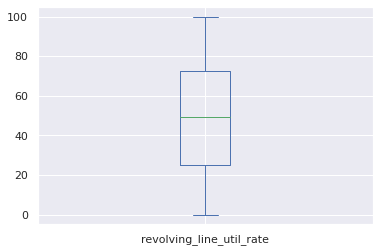

In [85]:
df.revolving_line_util_rate.plot(kind="box")

In [86]:
# We are not imputing data for revolving_line_util_rate column. 
# But as per the describe function, and the box plot, there are not outliers and the data is evenly distributed among the values. 
# So we can impute it with median.

#### **7. Filter Rows (Remove outliers that can deviate the result and analysis)**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amount                 38577 non-null  int64         
 1   funded_amount               38577 non-null  int64         
 2   funded_amount_investors     38577 non-null  float64       
 3   term                        38577 non-null  object        
 4   interest_rate               38577 non-null  float64       
 5   installment                 38577 non-null  float64       
 6   grade                       38577 non-null  object        
 7   sub_grade                   38577 non-null  object        
 8   emp_length                  38577 non-null  int64         
 9   home_ownership              38577 non-null  object        
 10  annual_income               38577 non-null  float64       
 11  verification_status         38577 non-null  object    

##### ***Identify which columns might have outliers***

In [88]:
df.describe()

,loan_amount,funded_amount,funded_amount_investors,interest_rate,installment,emp_length,annual_income,debt_to_income,delinq_2yrs,inquiry_in_last_6_months,open_acc,public_derogatory_records,revolving_balance,revolving_line_util_rate,total_credit_lines,public_record_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38527.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,5.076445,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,48.702777,22.052648,0.042694
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,3.602917,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,28.364741,11.425861,0.202809
min,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,25.200000,13.000000,0.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,49.100000,20.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,72.300000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000


**Columns that seems to have varying data:**
1.   annual_income
2.   open_acc
3.   revolving_balance
4.   total_credit_lines

##### ***Checking these columns for outliers and treating them accordingly***

###### ***annual_income***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


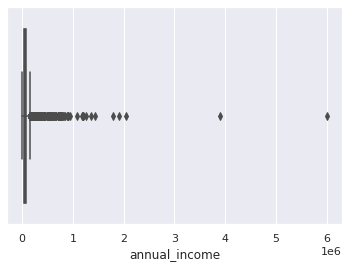

In [89]:
# Checking the presence of outliers through boxplot

sns.boxplot(df.annual_income)
plt.show()

The data appears dense on the left side and there are clearly 2 outliers on the right side of the graph. Also, if we look closely, there are very few records having salary > 1000000. We can consider these as outliers. Before this point, there are outliers according to the graph, but that outlier area is also dense, we we will not remove those data.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


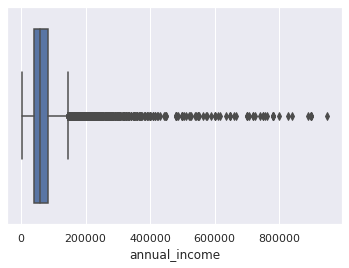

In [90]:
# Checking how the data will look like after removing the annual income outliers

sns.boxplot(df[df.annual_income<=1000000].annual_income)
plt.show()

The graph looks a bit cleaner than before. There are still outliers, but the outlier area is pretty dense, and appears to be relevant. So we will not remove any further records.

In [91]:
# Removing the concluded outliers for annual_income column

df=df[df.annual_income<=1000000]

###### ***open_acc***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


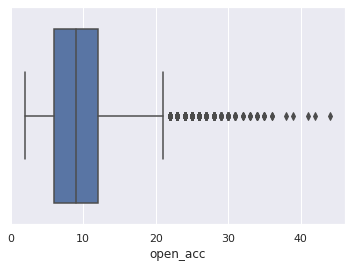

In [92]:
sns.boxplot(df.open_acc)
plt.show()

In [93]:
# People having more than 38 accounts are outliers. 
# Checking if any of these are defaulters

df[(df.open_acc>38) & (df.loan_status=="Charged Off")].count()

loan_amount                   0
funded_amount                 0
funded_amount_investors       0
term                          0
interest_rate                 0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_income                 0
verification_status           0
issue_date                    0
loan_status                   0
purpose                       0
address_state                 0
debt_to_income                0
delinq_2yrs                   0
earliest_credit_line          0
inquiry_in_last_6_months      0
open_acc                      0
public_derogatory_records     0
revolving_balance             0
revolving_line_util_rate      0
total_credit_lines            0
public_record_bankruptcies    0
dtype: int64

In [94]:
# None of these are defaulters, so we can remove these outliers as they are not needed for our analysis.

df=df[~(df.open_acc>38)]

###### ***revolving_balance***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


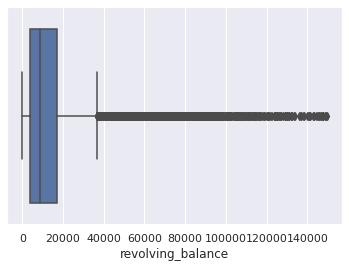

In [95]:
sns.boxplot(df.revolving_balance)
plt.show()

In [96]:
# The outliers graph is also pretty dense for this column. So not removing any outiers from this column

###### ***total_credit_lines***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


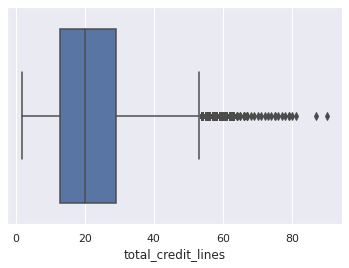

In [97]:
sns.boxplot(df.total_credit_lines)
plt.show()

In [98]:
# There are 2 outliers having more than 85 credit lines.
# Checking if they are defaulters or not. We will remove them if they are not defaulters.

df[(df.total_credit_lines>85) & (df.loan_status=="Charged Off")].count()

loan_amount                   0
funded_amount                 0
funded_amount_investors       0
term                          0
interest_rate                 0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_income                 0
verification_status           0
issue_date                    0
loan_status                   0
purpose                       0
address_state                 0
debt_to_income                0
delinq_2yrs                   0
earliest_credit_line          0
inquiry_in_last_6_months      0
open_acc                      0
public_derogatory_records     0
revolving_balance             0
revolving_line_util_rate      0
total_credit_lines            0
public_record_bankruptcies    0
dtype: int64

In [99]:
# None of these are defaulters, so we can remove them

df=df[~(df.total_credit_lines>85)]

# **3. Univariate Analysis**



1.   Categorical Variables
2.   Quantitive Variables



In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38557 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amount                 38557 non-null  int64         
 1   funded_amount               38557 non-null  int64         
 2   funded_amount_investors     38557 non-null  float64       
 3   term                        38557 non-null  object        
 4   interest_rate               38557 non-null  float64       
 5   installment                 38557 non-null  float64       
 6   grade                       38557 non-null  object        
 7   sub_grade                   38557 non-null  object        
 8   emp_length                  38557 non-null  int64         
 9   home_ownership              38557 non-null  object        
 10  annual_income               38557 non-null  float64       
 11  verification_status         38557 non-null  object    

## **1. Categorical Variables**

The categorical variables in the data are:

*   term
*   grade
*   sub_grade
*   emp_length
*   home_ownership
*   verification_status
*   issue_date: month can be extracted
*   loan_status
*   purpose
*   address_state
*   earliest_credit_line: month can be extracted

In [101]:
# Extracting month from issue_date (derived variables)

df['issue_month'] = df['issue_date'].dt.month
df['earliest_credit_line_month'] = df['earliest_credit_line'].dt.month

<ipython-input-101-f0d129addc65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_month'] = df['issue_date'].dt.month
<ipython-input-101-f0d129addc65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earliest_credit_line_month'] = df['earliest_credit_line'].dt.month


In [102]:
cat_col=['term', 'grade', 'sub_grade','emp_length', 'home_ownership', 'verification_status', 'issue_month', 'loan_status', 'purpose','address_state','earliest_credit_line_month']
cat_col_xtick_rotation=[False,False,False,False,False,False,False,False,True,True,False]

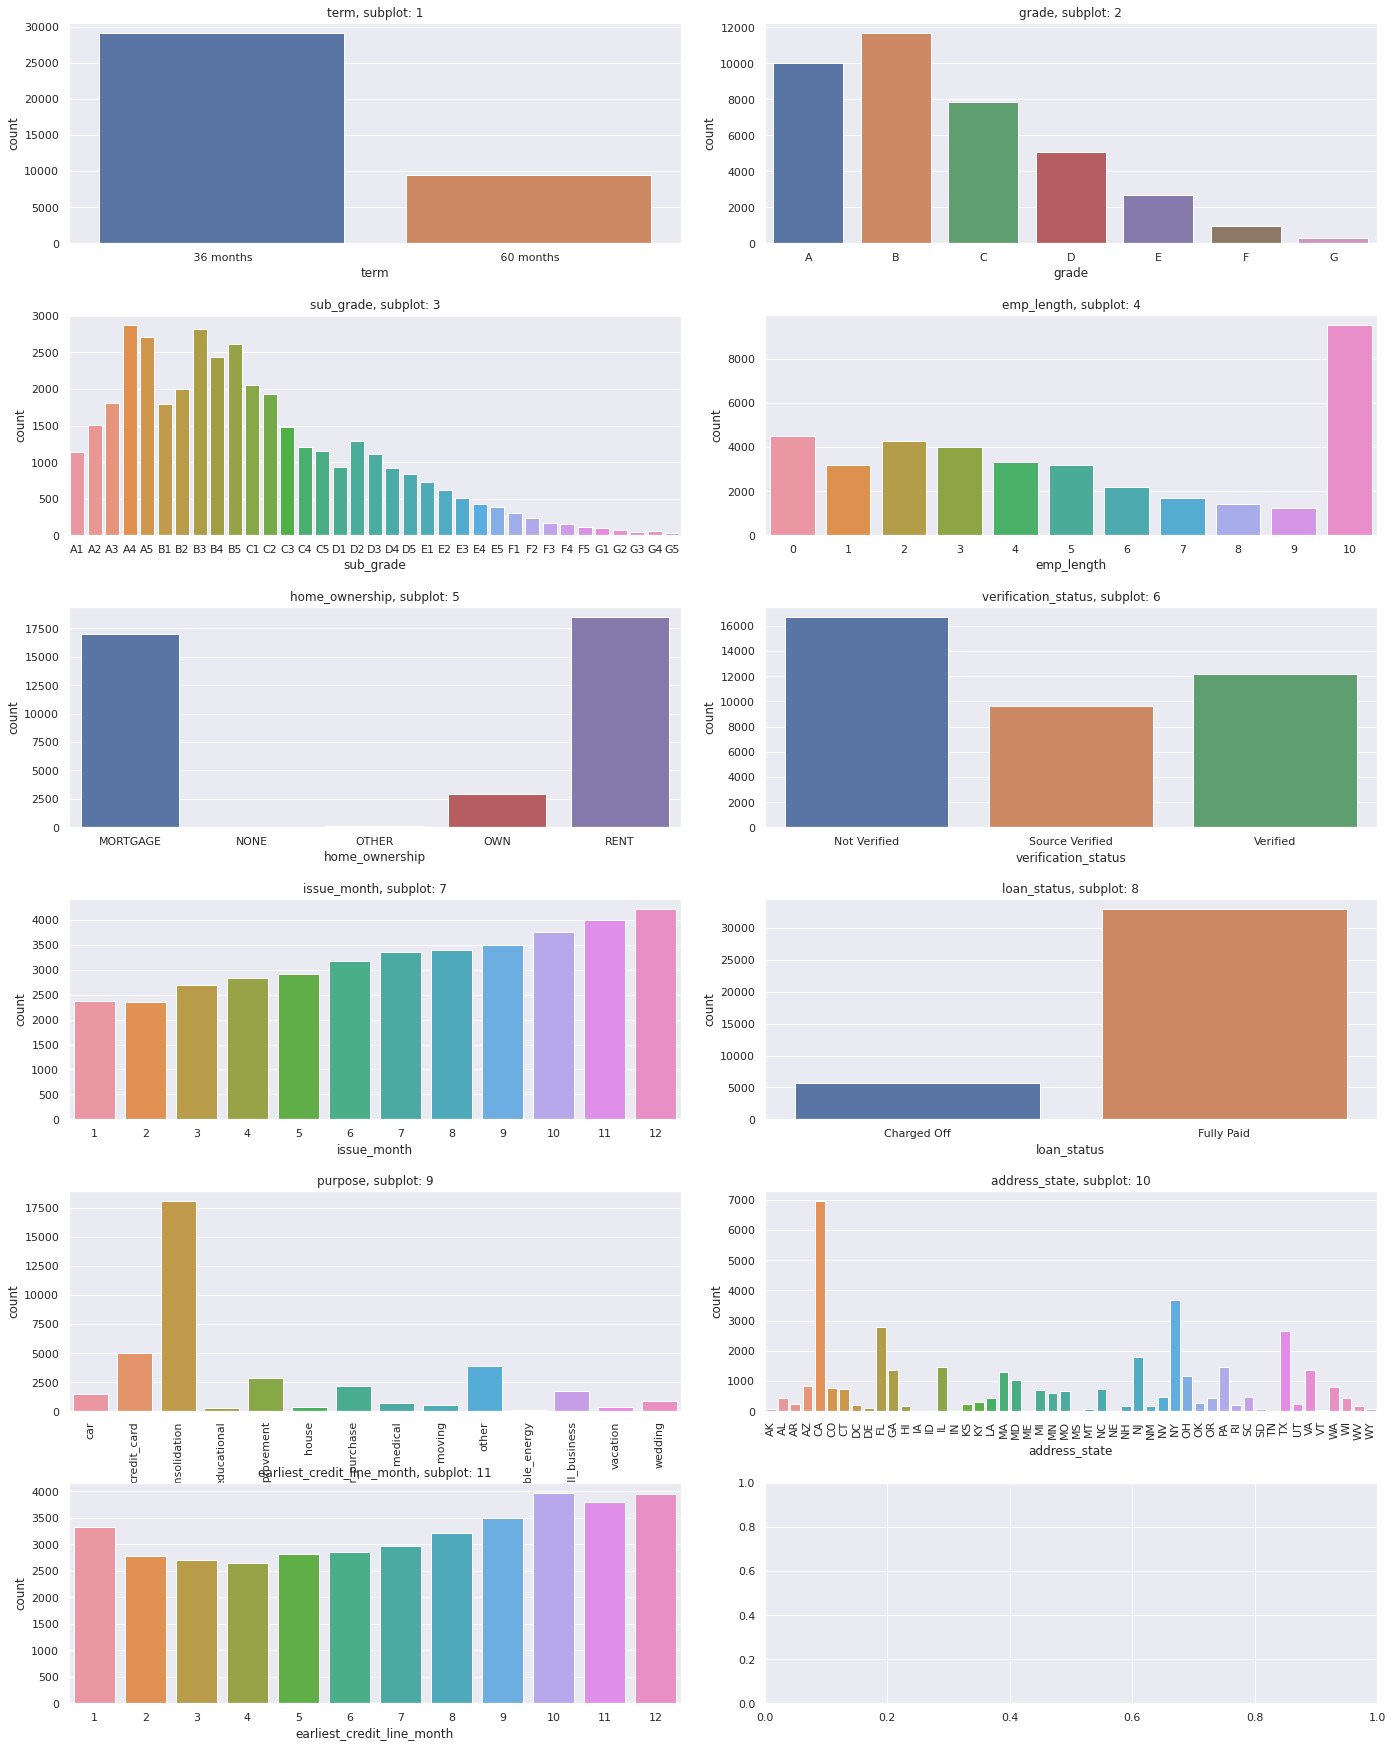

In [103]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter

fig, ax=plt.subplots(a, b, figsize=(50,40))
fig.set_size_inches(20, 25)
fig.tight_layout(pad=4)

for i in range(0,a):
    for j in range(0,b):
      if k<len(cat_col):
        ax[i][j].title.set_text('{}, subplot: {}'.format(cat_col[k], c))
        sns.countplot(data = df.sort_values(by=cat_col[k]), 
              x=cat_col[k],ax=ax[i][j])
        if cat_col_xtick_rotation[k]:
            ax[i][j].tick_params('x', labelrotation=90)
      else:
        break
      c = c + 1
      k = k + 1
      
plt.show();

**Summary of the plots**

*   **term**: Most of the people opt for 36 months term. Very few opt for 60 months.
*   **grade**: Most of the loans are of B and A grade. Fery few are of F and G grade.
*   **sub_grade**: Most of the loans are of A4, A5, B3 and B5.
*   **emp_length**: Most of the borrowers has employment length > 10.
*   **home_ownership**: Most of the borrowers have rental home or mortgage. 
*   **verification_status**: Most of the borrowers income is not verified.
*   **issue_month**: Most of the loans are taken in December. Though there is a gradual increase in borrowers as months increase.
*   **loan_status**: Most of the loans are fully paid.
*   **purpose**: Most of the borrowers take loan for debt consolidation.
*   **address_state**: Most of the borrowers are from California, US.
*   **earliest_credit_line_month**: Most of the borrowers have earliest credit line in October. But there is not much difference in the other months' data as well.



## **2. Quantitive Variables**

The quantitivev variables in the data are:

*   loan_amount
*   funded_amount
*   funded_amount_investors
*   interest_rate
*   installment
*   emp_length
*   annual_income
*   debt_to_income
*   delinq_2yrs
*   inquiry_in_last_6_months
*   open_acc
*   public_derogatory_records
*   revolving_balance
*   revolving_line_util_rate
*   total_credit_lines
*   public_record_bankruptcies

In [104]:
# Dividing these columns into 2 parts solely on the basis of their order in the data for clear analysis.

In [105]:
num_col1=['loan_amount','funded_amount','funded_amount_investors','interest_rate','installment','emp_length','annual_income','debt_to_income']
len(num_col1)

8

In [106]:
num_col2=['delinq_2yrs','inquiry_in_last_6_months','open_acc','public_derogatory_records','revolving_balance','revolving_line_util_rate','total_credit_lines','public_record_bankruptcies']
len(num_col2)

8

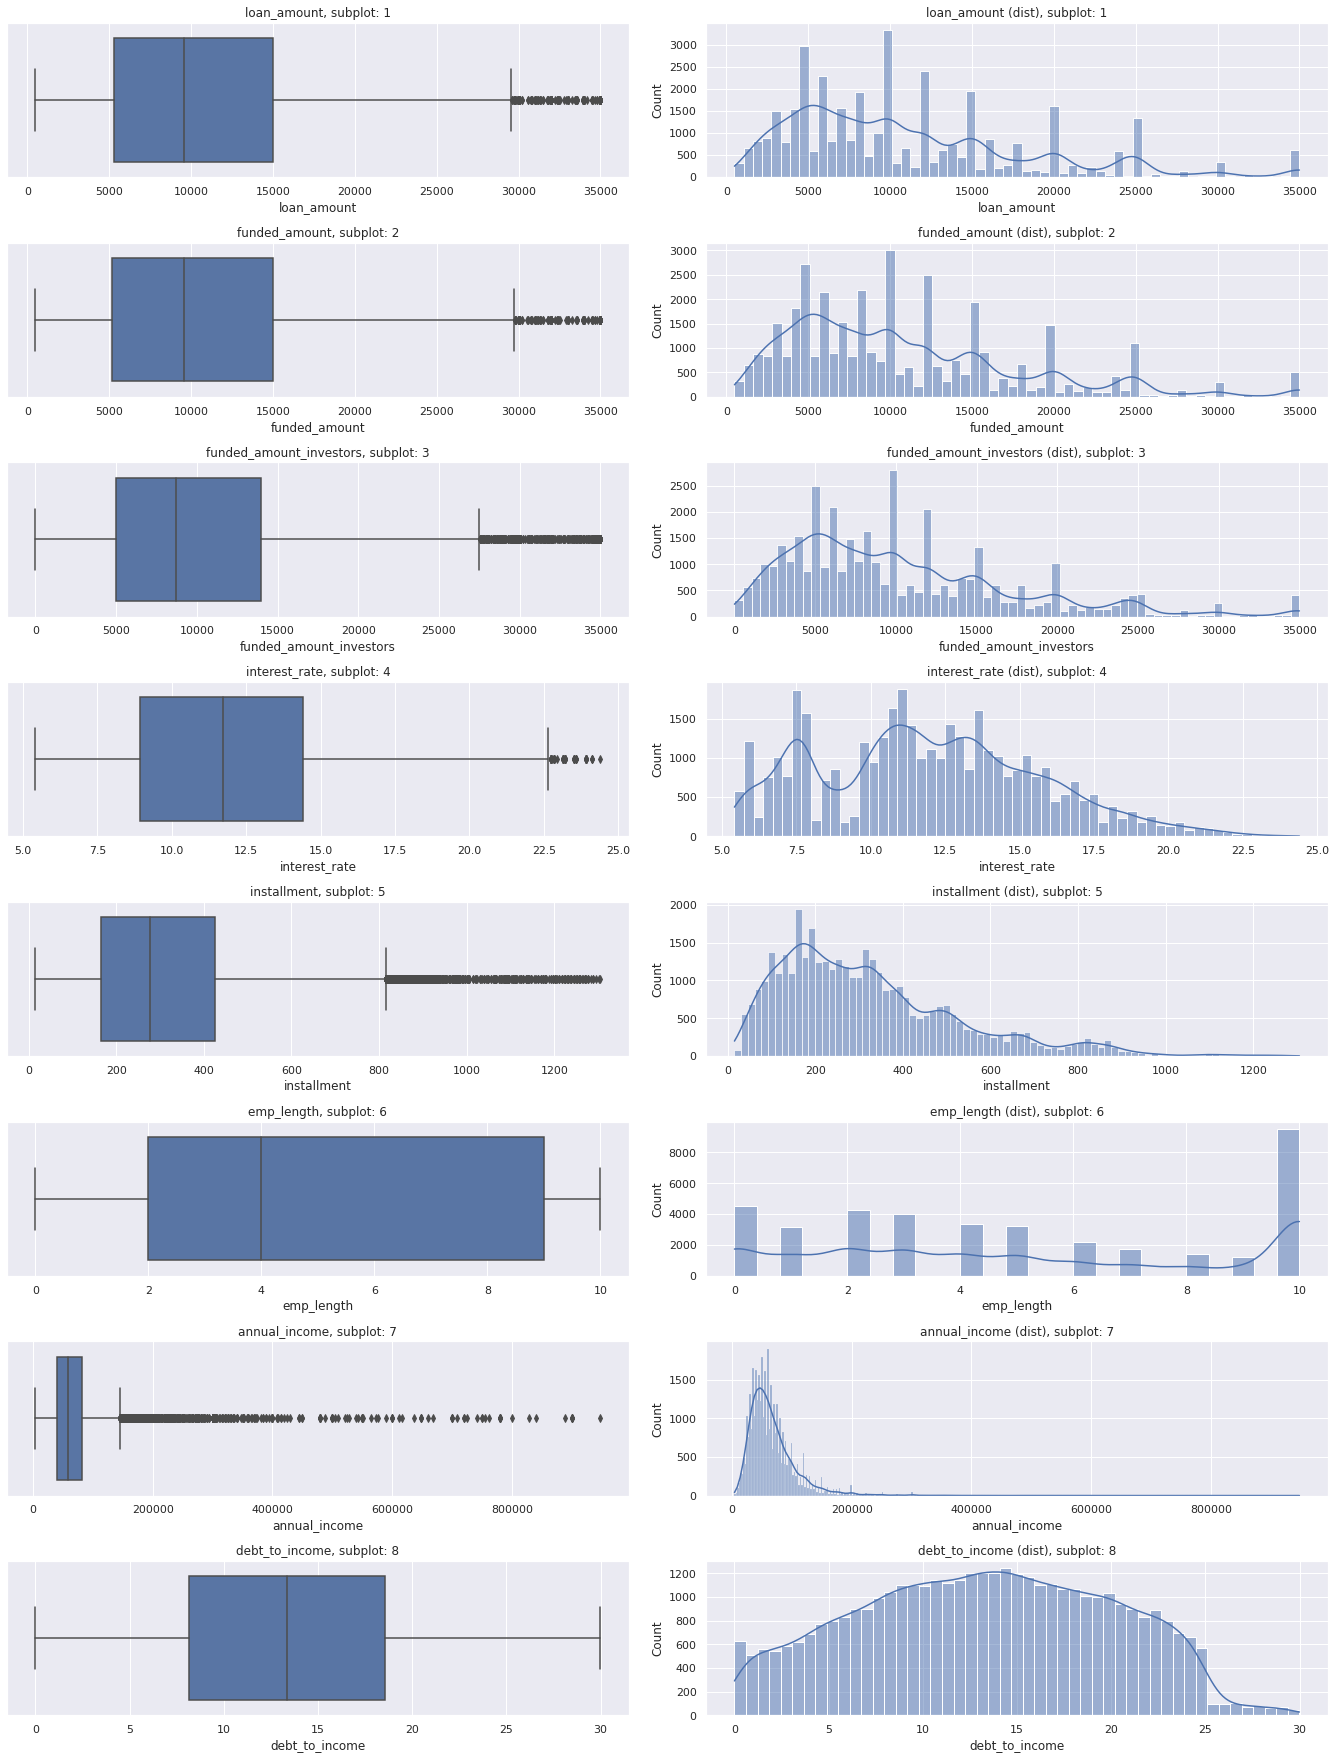

In [107]:
# Plotting for num_col1
a = 8  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter

fig, ax=plt.subplots(a, b, figsize=(100,80))
fig.set_size_inches(20, 25)
fig.tight_layout(pad=3.5)


for i in range(0,a):
    if k<len(num_col1):
      ax[i][0].title.set_text('{}, subplot: {}'.format(num_col1[k], c))
      sns.boxplot(x=df[num_col1[k]],ax=ax[i][0])

      ax[i][1].title.set_text('{} (dist), subplot: {}'.format(num_col1[k], c))
      sns.histplot(x=df[num_col1[k]],ax=ax[i][1],kde=True)
    else:
      break

    c = c + 1
    k = k + 1

plt.show();

**Summary of the plots**

*   **loan_amount**, **funded_amount**, **funded_amount_investors**: All these graphs are pretty much the same. Amounts is mostly spread on the lower-to-middle side of the range. We can also see sudden spikes at round numbers like 5000, 10000, 20000 etc. This maybe because person mostly applies for loan in the round amount. And investors also invest the same way.
*   **interest_rate**: The distirbution graph declines slowly at higher end of values. There is also a fall between 7.5% and 10%. There are a few outliers also, but we have not removed them since they are pretty dense too.
*   **installment**: Most of the installments are on the lower side of range. Slowly declining the distribution graph towards the higher side.
*   **emp_length**: Most of the people has employment length > 10. There are no outliers there as well.
*   **annual_income**: Majority of the people have income on the lower side of the range. There are a few outliers, but since they are useful for analysis, we have not removed them.
*   **debt_to_income**: debt to income is almost equally spread and there are no outliers as well.

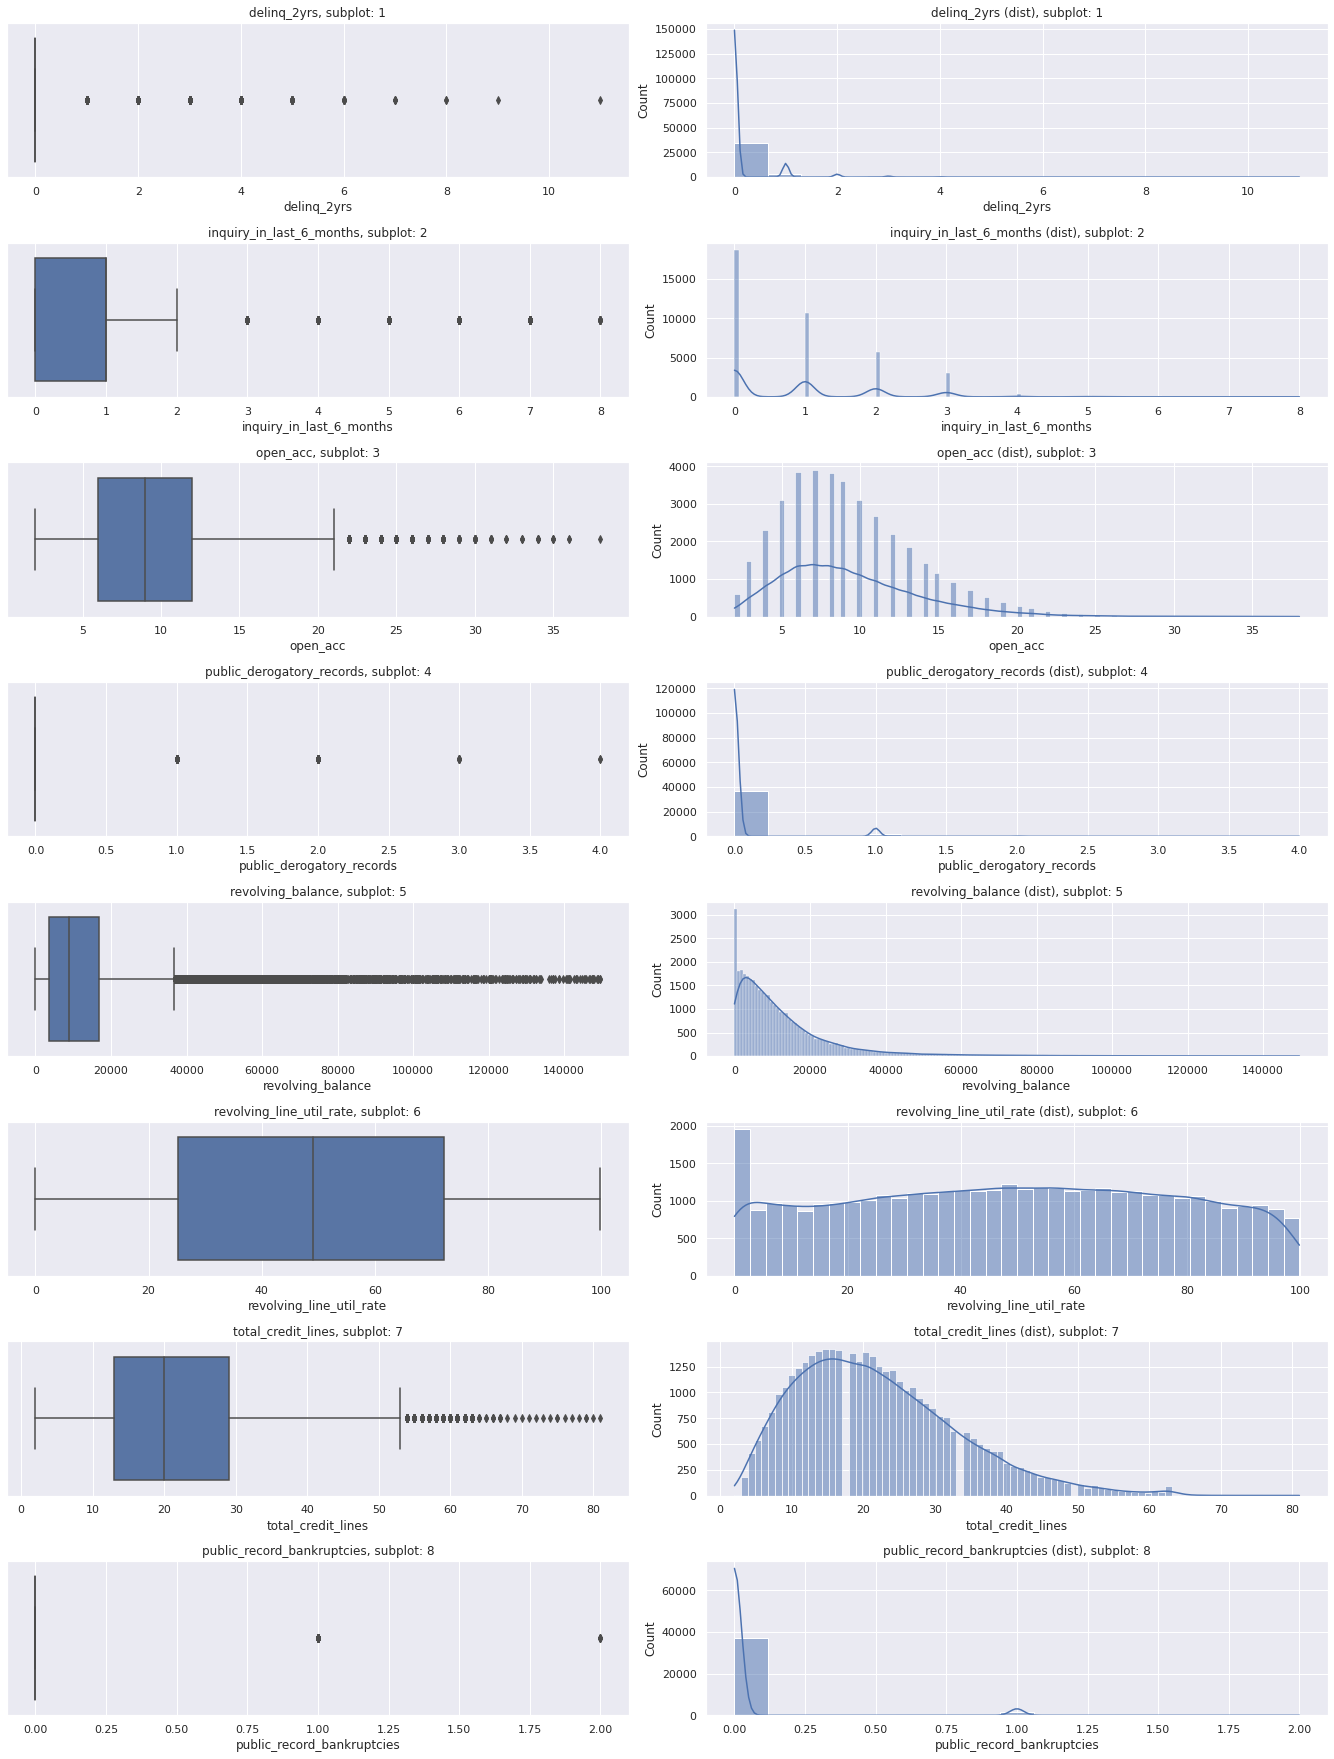

In [108]:
# Plotting for num_col2
a = 8  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter

fig, ax=plt.subplots(a, b, figsize=(100,80))
fig.set_size_inches(20, 25)
fig.tight_layout(pad=3.5)


for i in range(0,a):
    if k<len(num_col2):
      ax[i][0].title.set_text('{}, subplot: {}'.format(num_col2[k], c))
      sns.boxplot(x=df[num_col2[k]],ax=ax[i][0])

      ax[i][1].title.set_text('{} (dist), subplot: {}'.format(num_col2[k], c))
      sns.histplot(x=df[num_col2[k]],ax=ax[i][1],kde=True)
    else:
      break

    c = c + 1
    k = k + 1

plt.show();

**Summary of the plots**

*   **delinq_2yrs**: Most of the borrowers have not delinquented in last 2 years. But we wanted to see the insights of the data, so we are not removing the outliers or the column.
*   **inquiry_in_last_6_months**: Most of the people have made 0/1 inquiries, but there are many people who made more than that. they are visible as outliers in the plot, but they are important for analysis.
*   **open_acc**: Most of the people have accounts between 1 and 20.
*   **public_derogatory_records**: Most of the people has no public_derogatory_records.
*   **revolving_balance**: Most of the people has revolving balance on the lower end of range. But the outliers graph is also pretty dense.
*   **revolving_line_util_rate**: Most of the people have revolving utilization rate near to 0. After that, the data is almost equally distributed.
*   **total_credit_lines**: Most of the people have accounts between 1 and 30.
*   **public_record_bankruptcies**: Most of the people has no public_record_bankruptcies.

# **4. Segmented Univariate Analysis**

**The target variable for segemnted univariate analysis is *'loan_status'***

We will analyze all the categorical and quantitive variables against the target variable. This will provide us insights about the driving variables for the loans getting charged off.

In [109]:
target_variable='loan_status'

## 1. Segmented Univariate Analysis against categorical variables

In [110]:
# removing the target variable fromt he categorical columns list as we will analyze these columns against the target variable.

cat_col_segemnted=['term', 'grade', 'sub_grade','emp_length', 'home_ownership', 'verification_status', 'issue_month', 'purpose','address_state','earliest_credit_line_month']
cat_col_segemnted_xtick_rotation=[False,False,False,False,False,False,False,True,True,False]

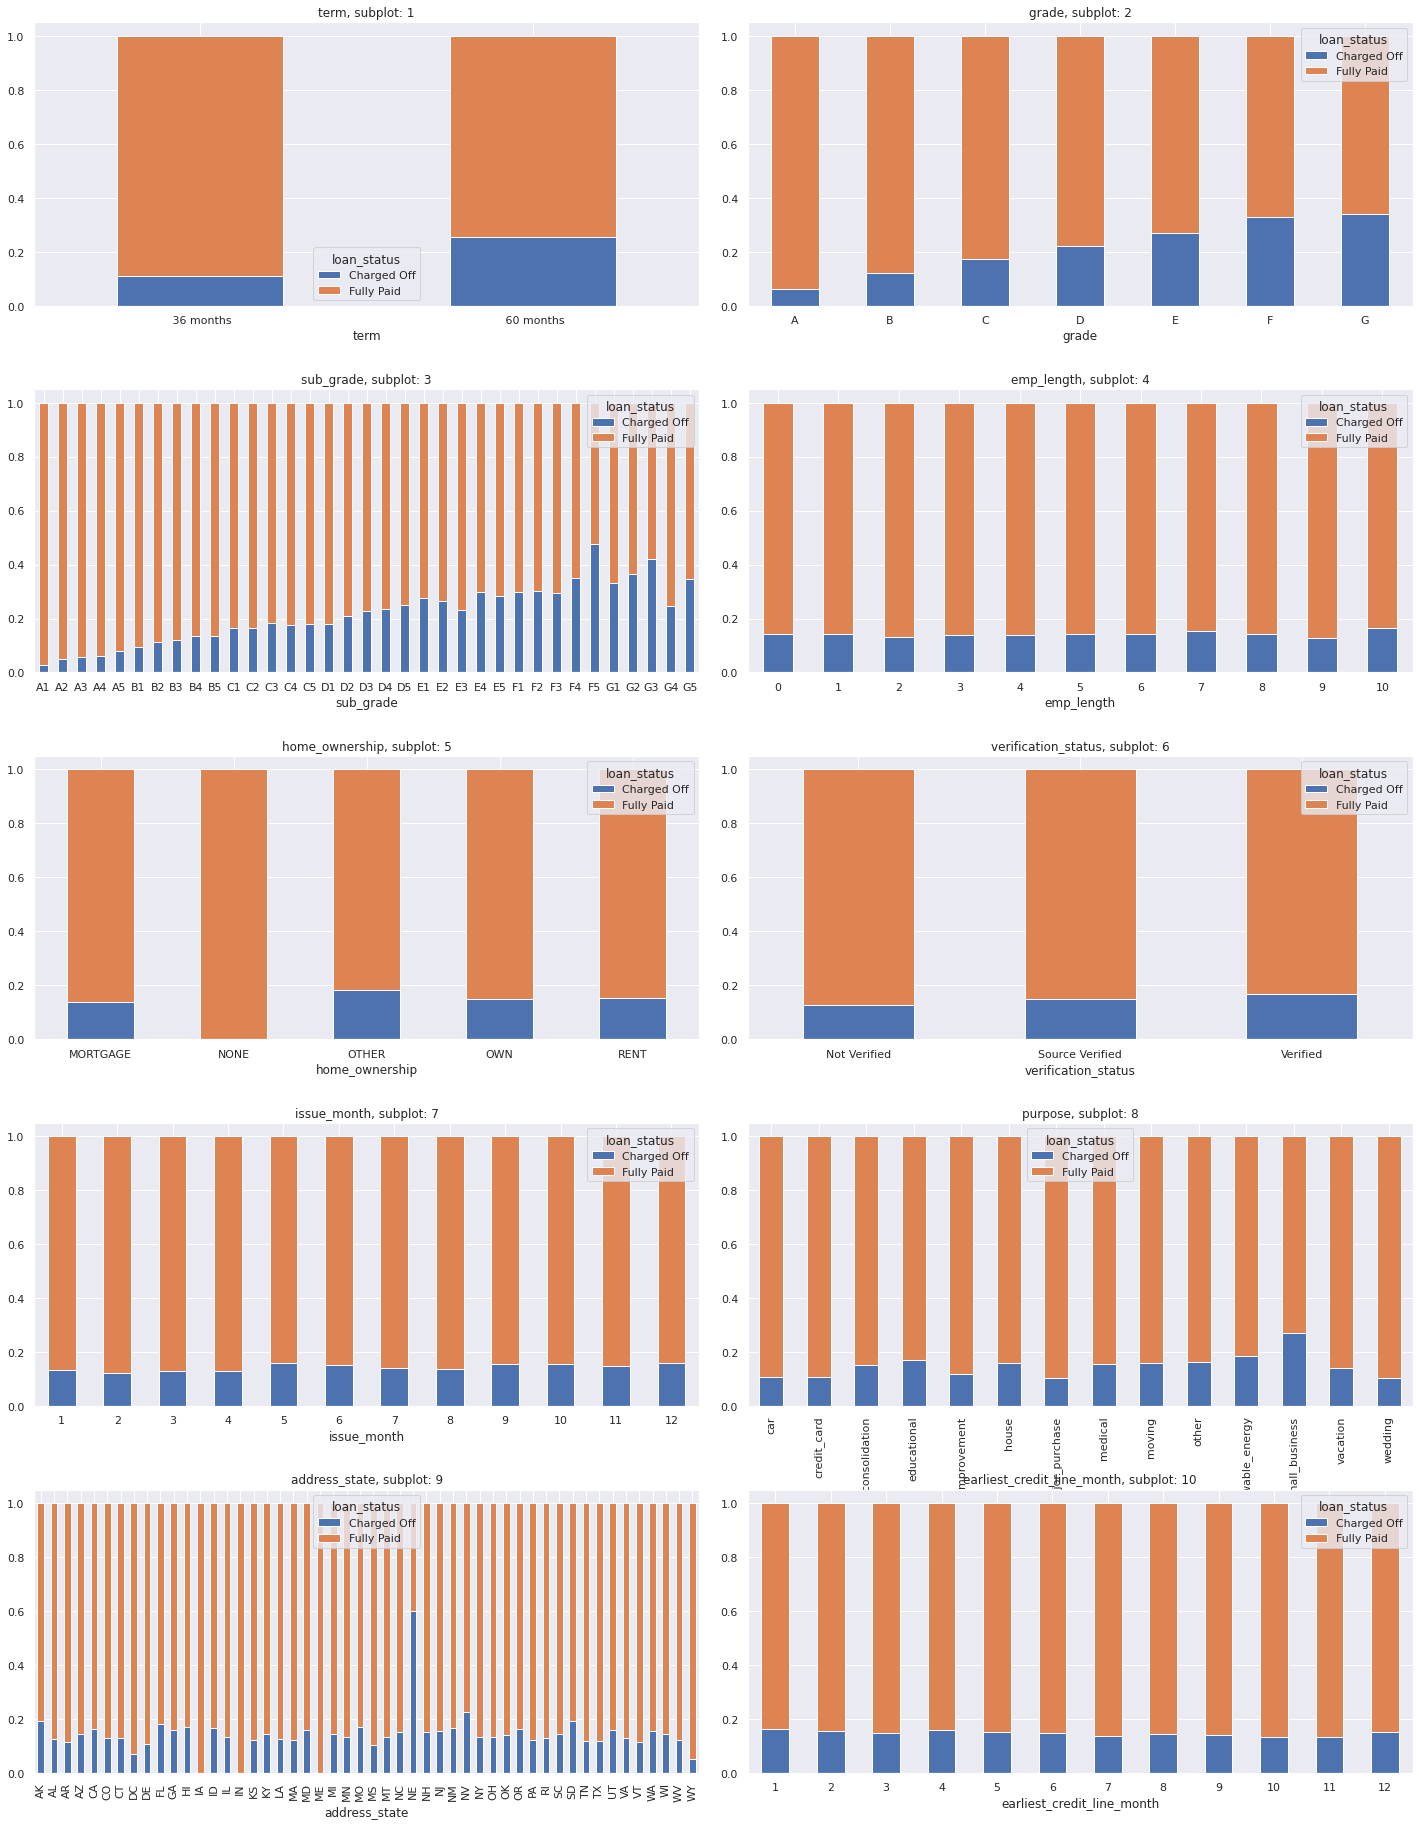

In [111]:
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter

fig, ax=plt.subplots(a, b, figsize=(50,40))
fig.set_size_inches(20, 25)
fig.tight_layout(h_pad=5)

for i in range(0,a):
    for j in range(0,b):
      if k<len(cat_col_segemnted):
        ax[i][j].title.set_text('{}, subplot: {}'.format(cat_col_segemnted[k], c))
        table=pd.crosstab(df[cat_col_segemnted[k]],df[target_variable])
        table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,ax=ax[i][j])
        if not cat_col_segemnted_xtick_rotation[k]:
            ax[i][j].tick_params('x', labelrotation=0)
      else:
        break
      c = c + 1
      k = k + 1
plt.show();

**Insights from the plots**

*   **term**: More number of people who take 60 months of loan are defaulters. And as earlier observed also, there are in fact less number of people who take 60 months loan. And among them also, more are
defaulters.
*   **grade**: As per graph, most number of defaulters are the people taking F and G grade loan.Already there are very few people taking F and G grade loan, among them also, more than 30% are defaulters.
*   **sub_grade**: Most of the people taking loans of subgrade F4, F5, G2 and G3 have defaulted.
*   **emp_length**: No major insights from this variable. As there are almost same % of defaulters for all the employment lengths.
*   **home_ownership**: No major insights from this variable. As there are almost same % of defaulters for all types of home ownership.
*   **verification_status**: No major insights from this variable. As there are almost same % of defaulters for all types of verification status.
*   **issue_month**: No major insights from this variable. As there are almost same % of defaulters for all issue months.
*   **purpose**: More number of people who take loan for small business, are defaulters. Also, as per earlier analysis, not many people take loan for small business, and among them also, there are high number of defaulters.
*   **address_state**: More number of people from Nebraska, US are defaulters. But we don't have enough data of Nebraska, US borrowers to mark this observation as true. Since there are very few customers from Nebraska, US.
*   **earliest_credit_line_month**: No major insights from this variable. As there are almost same % of defaulters for all earliest credit line months.


## 2. Segmented Univariate Analysis against quantitive variables

In [112]:
# our target variable is 'loan_status', which is categorical. SO we don't need new list of numerical variables. We will use the list that we already have.

print(num_col1)
print(num_col2)

['loan_amount', 'funded_amount', 'funded_amount_investors', 'interest_rate', 'installment', 'emp_length', 'annual_income', 'debt_to_income']
['delinq_2yrs', 'inquiry_in_last_6_months', 'open_acc', 'public_derogatory_records', 'revolving_balance', 'revolving_line_util_rate', 'total_credit_lines', 'public_record_bankruptcies']


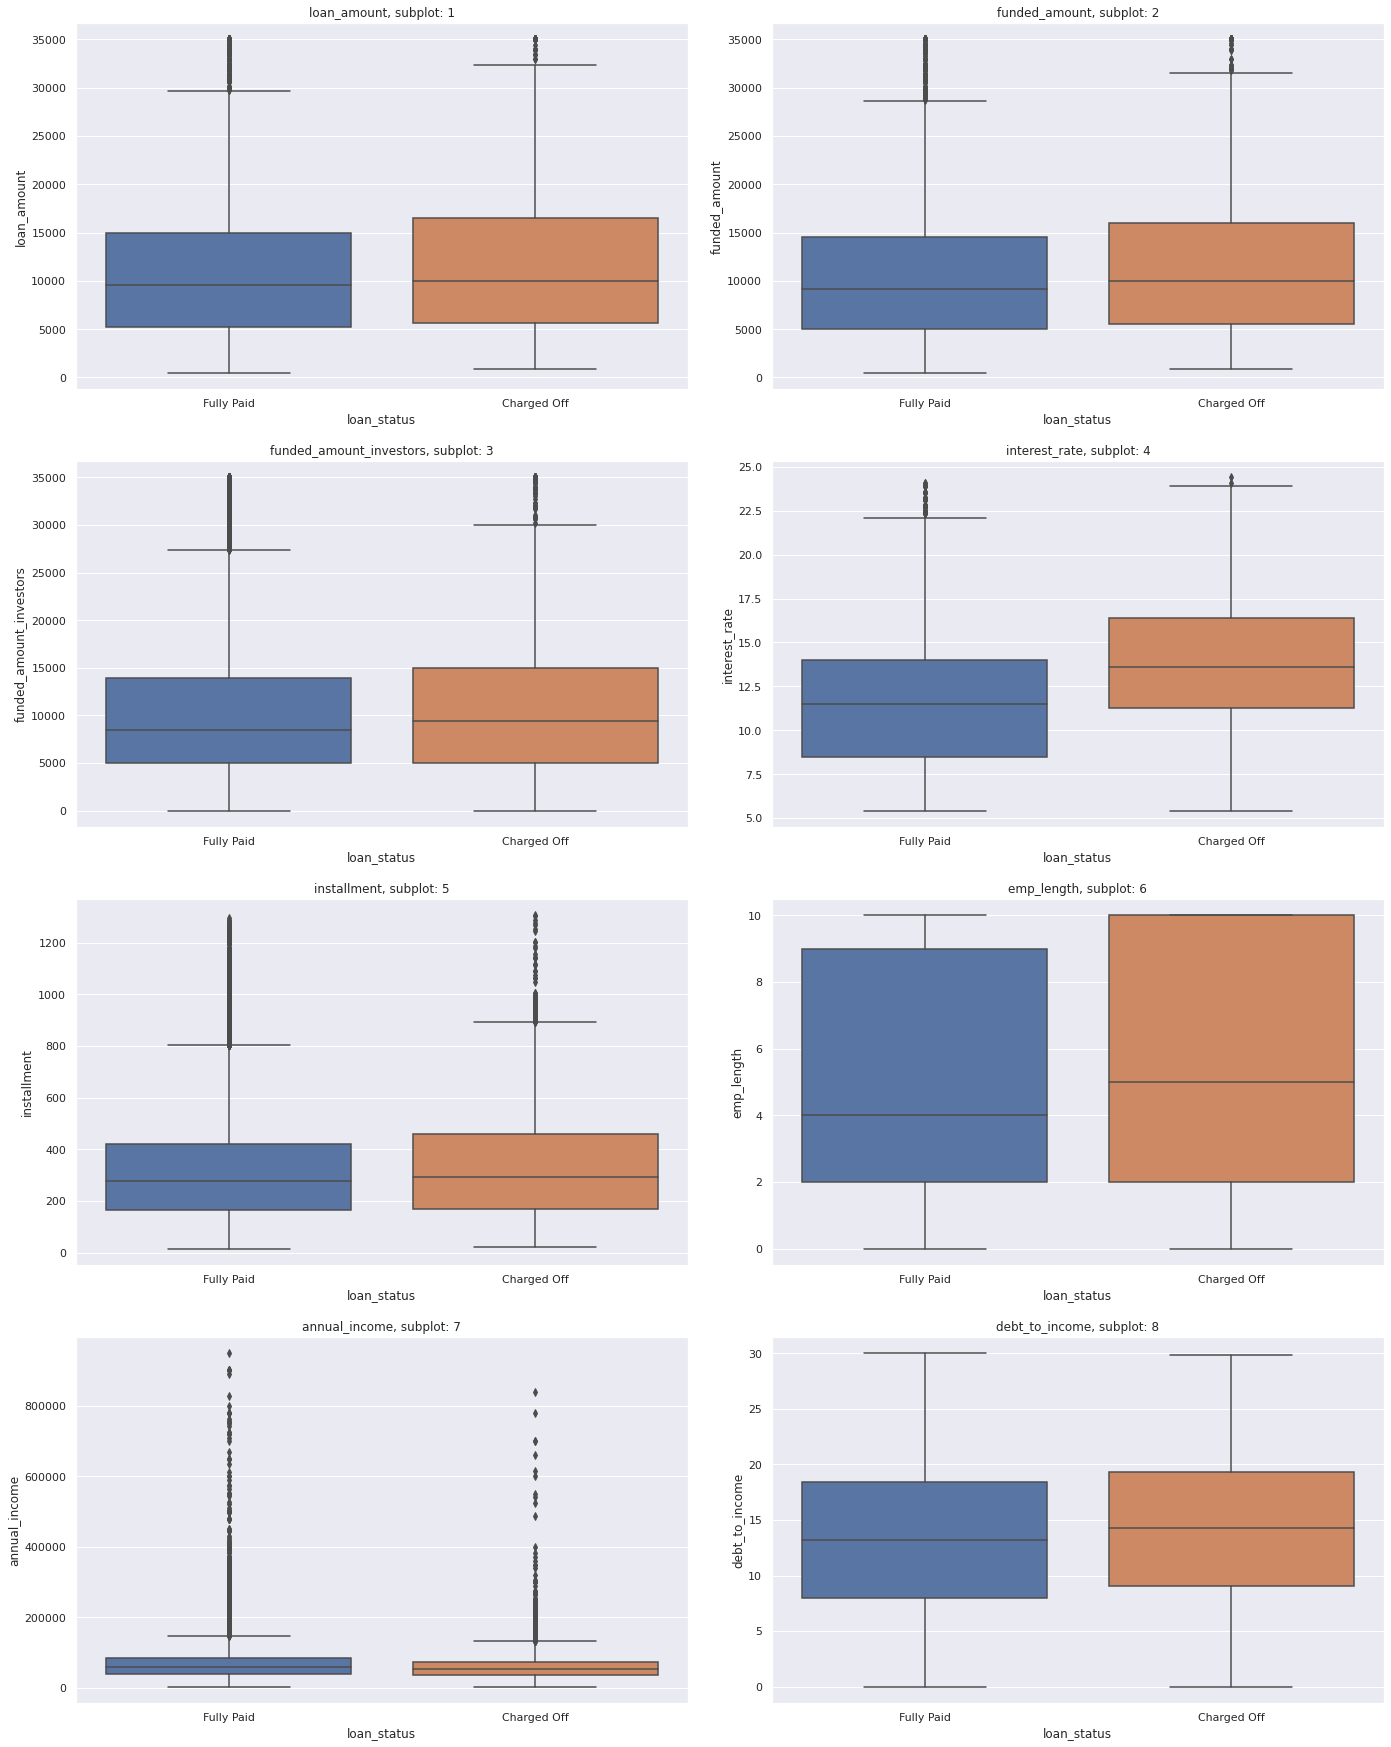

In [113]:
# For num_col1
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter

fig, ax=plt.subplots(a, b, figsize=(50,40))
fig.set_size_inches(20, 25)
fig.tight_layout(pad=4)

for i in range(0,a):
    for j in range(0,b):
      if k<len(num_col1):
        ax[i][j].title.set_text('{}, subplot: {}'.format(num_col1[k], c))
        sns.boxplot(data=df,x=target_variable,y=num_col1[k],orient="v",ax=ax[i][j])
      else:
        break
      c = c + 1
      k = k + 1
plt.show();

**Insights from the plots**

*   **loan_amount**:Borrowers who take more loan amount tend to have slightly higher chances of defaulting
*   **funded_amount**: Borrowers who take more funded amount tend to have slightly higher chances of defaulting
*   **funded_amount_investors** : Borrowers who take more funded amount by investors tend to have slightly higher chances of defaulting
*   **interest_rate**: Borrowers that get loan with higher intrest rates have higher chnaces of defaulting
*   **installment**: Borrowers that have more number of installments have higher chnaces of defaulting
*   **emp_length**:Borrowers whose employee length is of longer tenure have higher chnaces of defaulting
*   **annual_income**:Annual income of the borrower does not have much impact on the borrowers chances of being defaulted
*   **debt_to_income**:Borrowers whose debt to income ratio is more have higher chances of defaulting

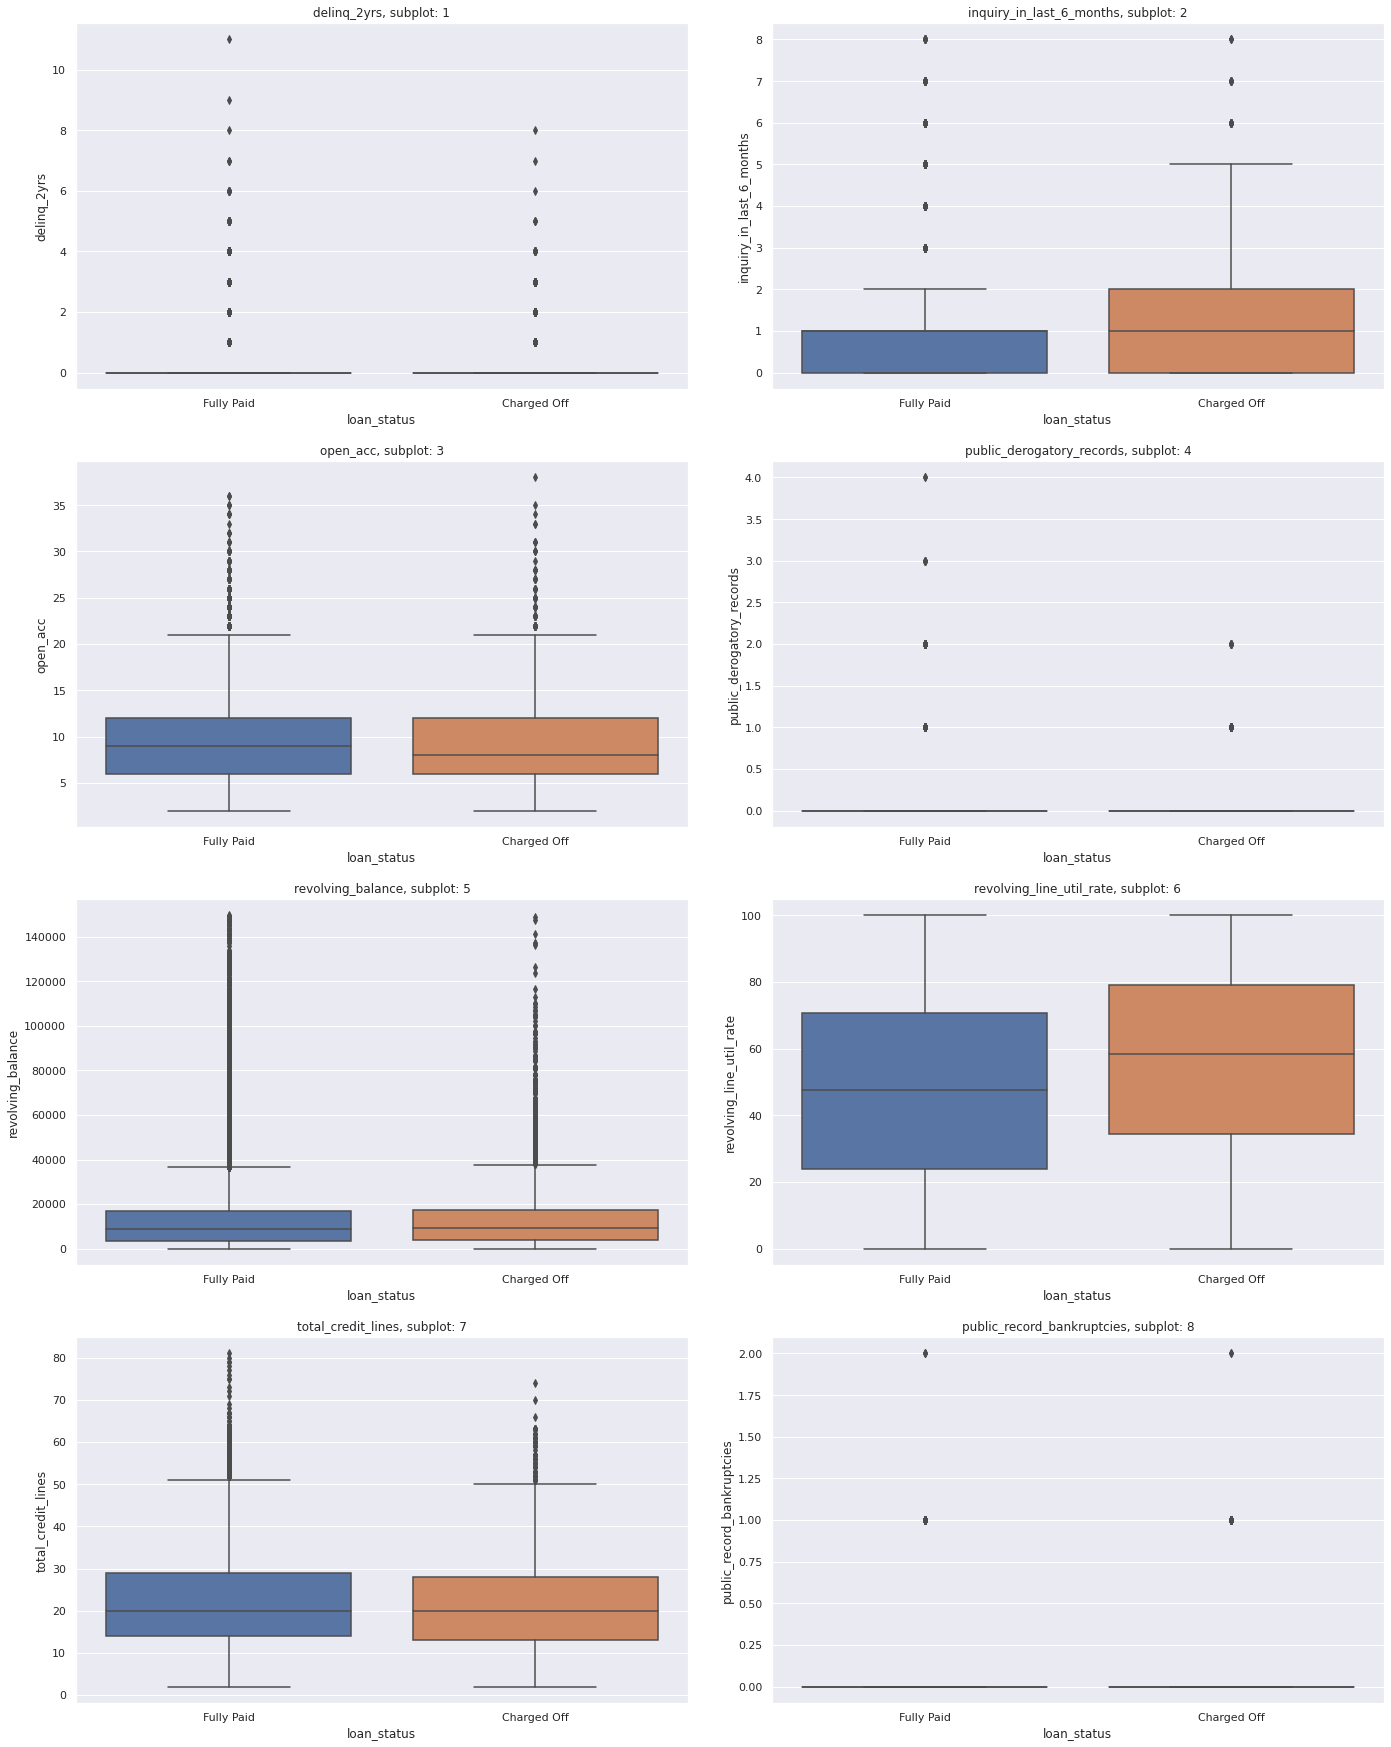

In [114]:
# For num_col2
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter

fig, ax=plt.subplots(a, b, figsize=(50,40))
fig.set_size_inches(20, 25)
fig.tight_layout(pad=4)

for i in range(0,a):
    for j in range(0,b):
      if k<len(num_col2):
        ax[i][j].title.set_text('{}, subplot: {}'.format(num_col2[k], c))
        sns.boxplot(data=df,x=target_variable,y=num_col2[k],orient="v",ax=ax[i][j])
      else:
        break
      c = c + 1
      k = k + 1
plt.show();

**Summary of the plots**

*   **delinq_2yrs**: No such insights from this variable as most of the borrowers have 0 deliquency in last 2 years
*   **inquiry_in_last_6_months**: The graph clearly shows that the people who inquired more number of times say 3,4,5 are mostly the ones who defaulted.
*   **open_acc**: No insights from this variable as both the graphs are pretty much the same.
*   **public_derogatory_records**: No such insights from this variable as most of the people has no public_derogatory_records.
*   **revolving_balance**: No insights from this variable as both the graphs are pretty much the same.
*   **revolving_line_util_rate**: As per the graph, mostly people having high revolving line utilization rate are more likely to default.
*   **total_credit_lines**: No insights from this variable as both the graphs are pretty much the same.
*   **public_record_bankruptcies**: No such insights from this variable as most of the people has no public_record_bankruptcies.

# **5. Bivariate Analysis**

Analyzing the correlation between quantitive variables as a part of bivariate analysis

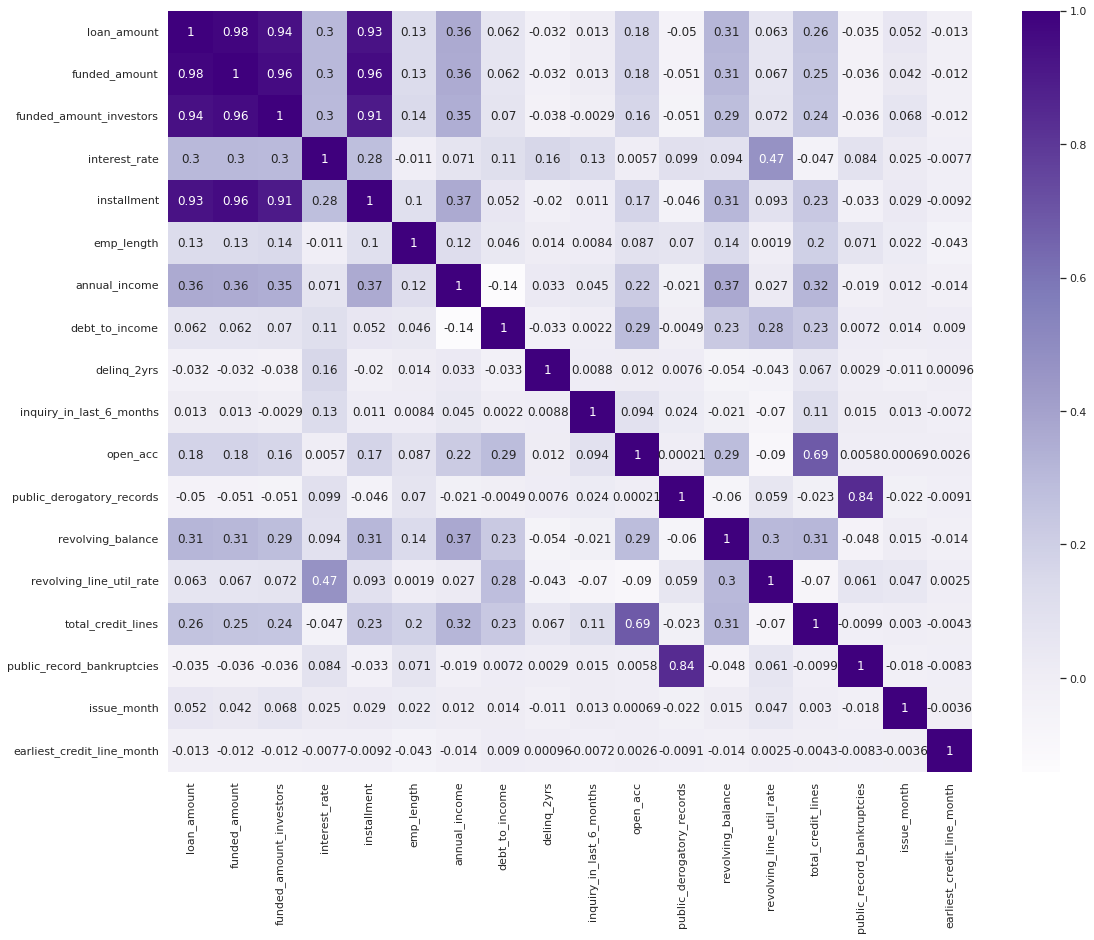

In [115]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(),cmap='Purples',annot=True)
plt.show()

**Summary of the plot**

*   As you can see, few variables like: loan_amount, funded_amount and
funded_amount_investors are highly correlated.
*   These 3 variables are also highly correlated with installment.
*   Total_credit_lines and open_acc are highly correlated.
*   Public_derogatory_records and public_record_bankruptcies are highly
correlated.
*   Debt to income and annual income are least correlated, in fact negatively
correlated.

